# Homework 5

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Task 1:
#### Plotting Task:
* Create a single plot, with multiple lines (one for each state), showing the number of accidents per day for each of the four states.
#### Analytical Focus:
* Identify peak periods or days when accidents are most frequent.
* Compare how the temporal patterns differ between the four states.

In [15]:
df = pd.read_csv('accident_100k.csv')

df = df.dropna()

df = df[df['State'].isin(['CA', 'TX', 'FL', 'NY'])]

df['date'] = pd.to_datetime(df['Weather_Timestamp'])
df['date'] = df['date'].dt.date

acc_per_day = df.groupby(['date', 'State']).size().reset_index(name='accident_count')
acc_per_day

,date,State,accident_count
0,2017-08-02,CA,1
1,2017-08-03,CA,1
2,2017-08-03,FL,1
3,2017-08-04,CA,2
4,2017-08-08,CA,2
...,...,...,...
657,2019-08-30,FL,42
658,2019-08-30,NY,26
659,2019-08-30,TX,13
660,2019-08-31,FL,1


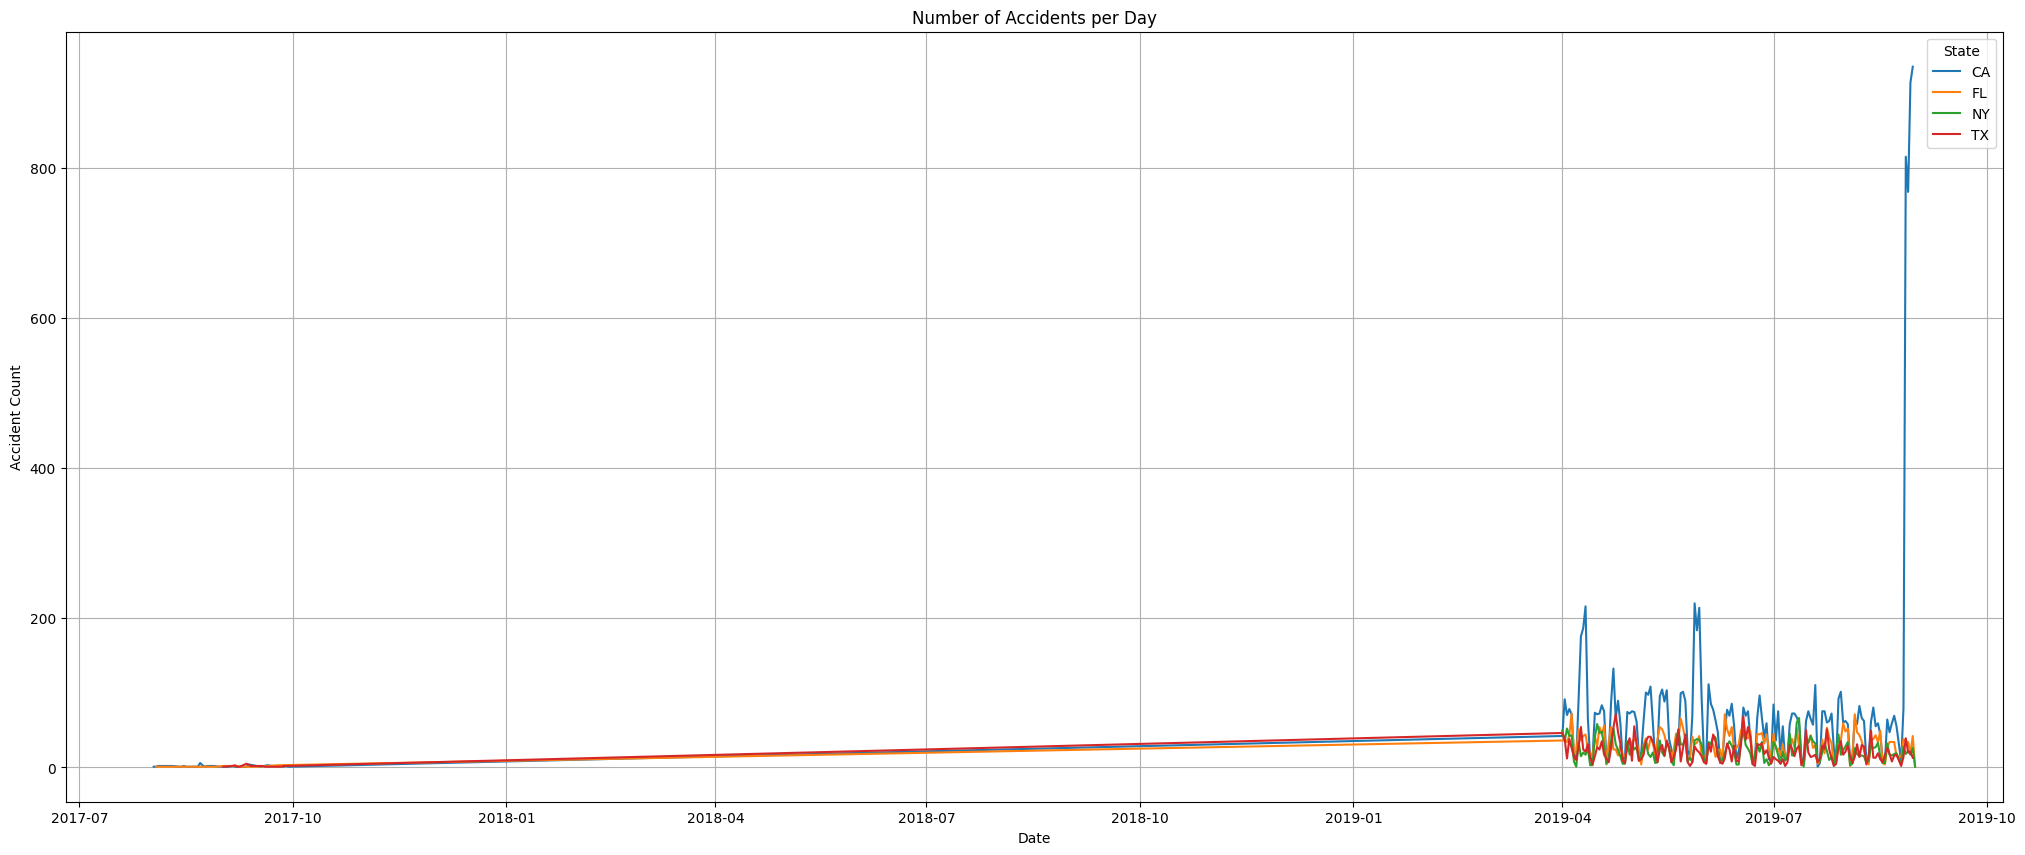

In [23]:
plt.figure(figsize=(25, 10))
for state, group in acc_per_day.groupby('State'):
    plt.plot(group['date'], group['accident_count'], label=state)
    
plt.title("Number of Accidents per Day")
plt.xlabel("Date")
plt.ylabel("Accident Count")
plt.legend(title='State')
plt.grid(True)